### Edgar Moises Hernandez-Gonzalez
#### 16/11/19-19/11/19
#### Clasificar RAW con GRU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 1000, 22))
x_test = x_test.reshape((n_samples_test, 1000, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1000, 22)
(288, 1000, 22)


In [14]:
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(1000,22)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1000, 64)          16704     
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 41,732
Trainable params: 41,732
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=10, batch_size=18, validation_data=(x_test, y_test)) #cambiar a 20 epocas

Train on 288 samples, validate on 288 samples
Epoch 1/10
288/288 [==============================] - 69s 238ms/sample - loss: 1.4299 - acc: 0.2222 - val_loss: 1.3903 - val_acc: 0.2569
Epoch 2/10
288/288 [==============================] - 90s 312ms/sample - loss: 1.3896 - acc: 0.2743 - val_loss: 1.3981 - val_acc: 0.2465
Epoch 3/10
288/288 [==============================] - 85s 294ms/sample - loss: 1.3731 - acc: 0.3125 - val_loss: 1.3881 - val_acc: 0.2951
Epoch 4/10
288/288 [==============================] - 84s 293ms/sample - loss: 1.3488 - acc: 0.3299 - val_loss: 1.3848 - val_acc: 0.2708
Epoch 5/10
288/288 [==============================] - 89s 307ms/sample - loss: 1.3446 - acc: 0.3160 - val_loss: 1.3943 - val_acc: 0.2708
Epoch 6/10
288/288 [==============================] - 79s 275ms/sample - loss: 1.3374 - acc: 0.3194 - val_loss: 1.3903 - val_acc: 0.3160
Epoch 7/10
288/288 [==============================] - 77s 266ms/sample - loss: 1.3170 - acc: 0.3576 - val_loss: 1.4017 - val_acc: 0.

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 13s 46ms/sample - loss: 1.4160 - acc: 0.2917
Test loss: 1.4159957435395982
Test accuracy: 0.29166666


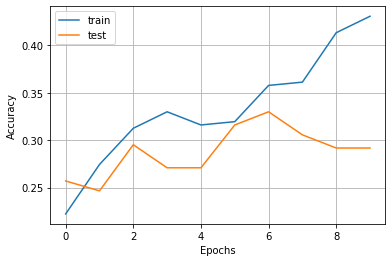

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

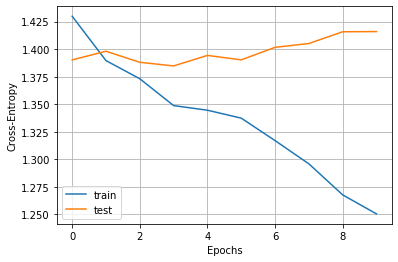

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [21]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [22]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.05555555555555558


In [23]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[21 22 14 15]
 [15 23 20 14]
 [18 12 24 18]
 [23 15 18 16]]


In [24]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.27      0.29      0.28        72
           1       0.32      0.32      0.32        72
           2       0.32      0.33      0.32        72
           3       0.25      0.22      0.24        72

   micro avg       0.29      0.29      0.29       288
   macro avg       0.29      0.29      0.29       288
weighted avg       0.29      0.29      0.29       288

